# **Problem Statement**
Develop a predictive model to evaluate the risk of developing Diabetes or Obesity for individuals based on their dietary habits. The model will consider various food categories (such as Fruits, Vegetables, Grains, Meats, Dairy, Beverages, and Nutritional Contents) and predict the likelihood of a person developing these lifestyle diseases. The objective is to provide personalized dietary advice to prevent or mitigate the risk of these diseases.
# **Questions to Address:**
1. Relationship between food and lifestyle diseases: we will investigate how different food categories and nutrients correlate with the prevalence of Diabetes and Obesity.

2. Geographical variation in lifestyle diseases: Identify which continents or countries exhibit higher levels of lifestyle disease and then explore the dietary patterns or food consumption trends in these regions.
3. Impact of national dishes on lifestyle diseases: Analyze whether countries with certain national dishes that may be high in fats, sugars, or other risk factors have higher rates of Diabetes and Obesity.
4.The role of income in lifestyle diseases: we will examine if there's a relationship between the average income of a country and the prevalence of lifestyle diseases, indicating differences in diet quality or access to healthy foods.
5. Reasons for high prevalence in certain countries: why some countries have higher levels of lifestyle diseases, considering factors such as food supply, income levels, and perhaps other socio-economic and environmental factors.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the data to see the first few rows and understand its structure
data = pd.read_csv('/content/GlobalDietaryDatabase_V2.csv')
data
# Display the first few rows of the dataset
data.head()


,Unnamed: 0,Entity,superregion2,iso3,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,...,"Supply_ Fish, shellfish and their products",Supply_ Meat and meat products,Supply_ Vegetables and their products,Supply_ Fruits and their products,Supply_ Fats and oils,Supply_ Sweets and sugars,Supply_ Spices and condiments,Supply_ Beverages,Supply_ Foods for particular nutritional uses,Supply_ Miscellaneous
0,1,Afghanistan,SAARC,AFG,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,...,1,48,27,76,222,134,3,1,0,1
1,2,Angola,SSA,AGO,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,...,28,106,14,112,267,135,0,85,4,2
2,3,Albania,FSU,ALB,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,...,16,263,211,393,297,308,2,83,1,19
3,4,United Arab Emirates,MENA,ARE,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,...,48,353,106,176,718,223,34,36,6,9
4,5,Argentina,LAC,ARG,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,...,11,601,52,91,552,400,3,125,NaN,NaN


# **DATA CLEANING**

In [ ]:

#Remove unnecessary columns
columns_to_drop = ['Unnamed: 0'] + [col for col in data.columns if col.startswith('Supply_')]
df_cleaned = data.drop(columns=columns_to_drop)

#Handle missing values. For simplicity, we'll fill missing values with the mean of their respective columns.
df_cleaned = df_cleaned.fillna(df_cleaned.mean(numeric_only=True))

#Check if there's any remaining missing value that wasn't handled (e.g., non-numeric columns).
missing_values_check = df_cleaned.isnull().sum()

#Check data types for a brief overview.
data_types = df_cleaned.dtypes

(df_cleaned.head(), missing_values_check, data_types)


(                 Entity superregion2 iso3      Fruits  Non-starchy vegetables  \
 0           Afghanistan        SAARC  AFG   65.697036               98.080124   
 1                Angola          SSA  AGO  119.746980              308.837004   
 2               Albania          FSU  ALB  138.874360              129.083757   
 3  United Arab Emirates         MENA  ARE  107.577820              123.284747   
 4             Argentina          LAC  ARG   93.995787              123.803276   
 
      Potatoes  Other starchy vegetables  Beans and legumes  Nuts and seeds  \
 0   21.195808                 44.892140         103.830266       31.205695   
 1  346.377109                 52.662482          37.799557       11.612246   
 2  185.783632                 73.031694          40.181361       12.272771   
 3  182.972287                 57.068126          40.563807       31.729379   
 4   51.336122                  7.010755           3.575009        1.564769   
 
    Refined grains  ...  Vitam

# **1.Correlation**
**1.Relationship between food and lifestyle diseases**

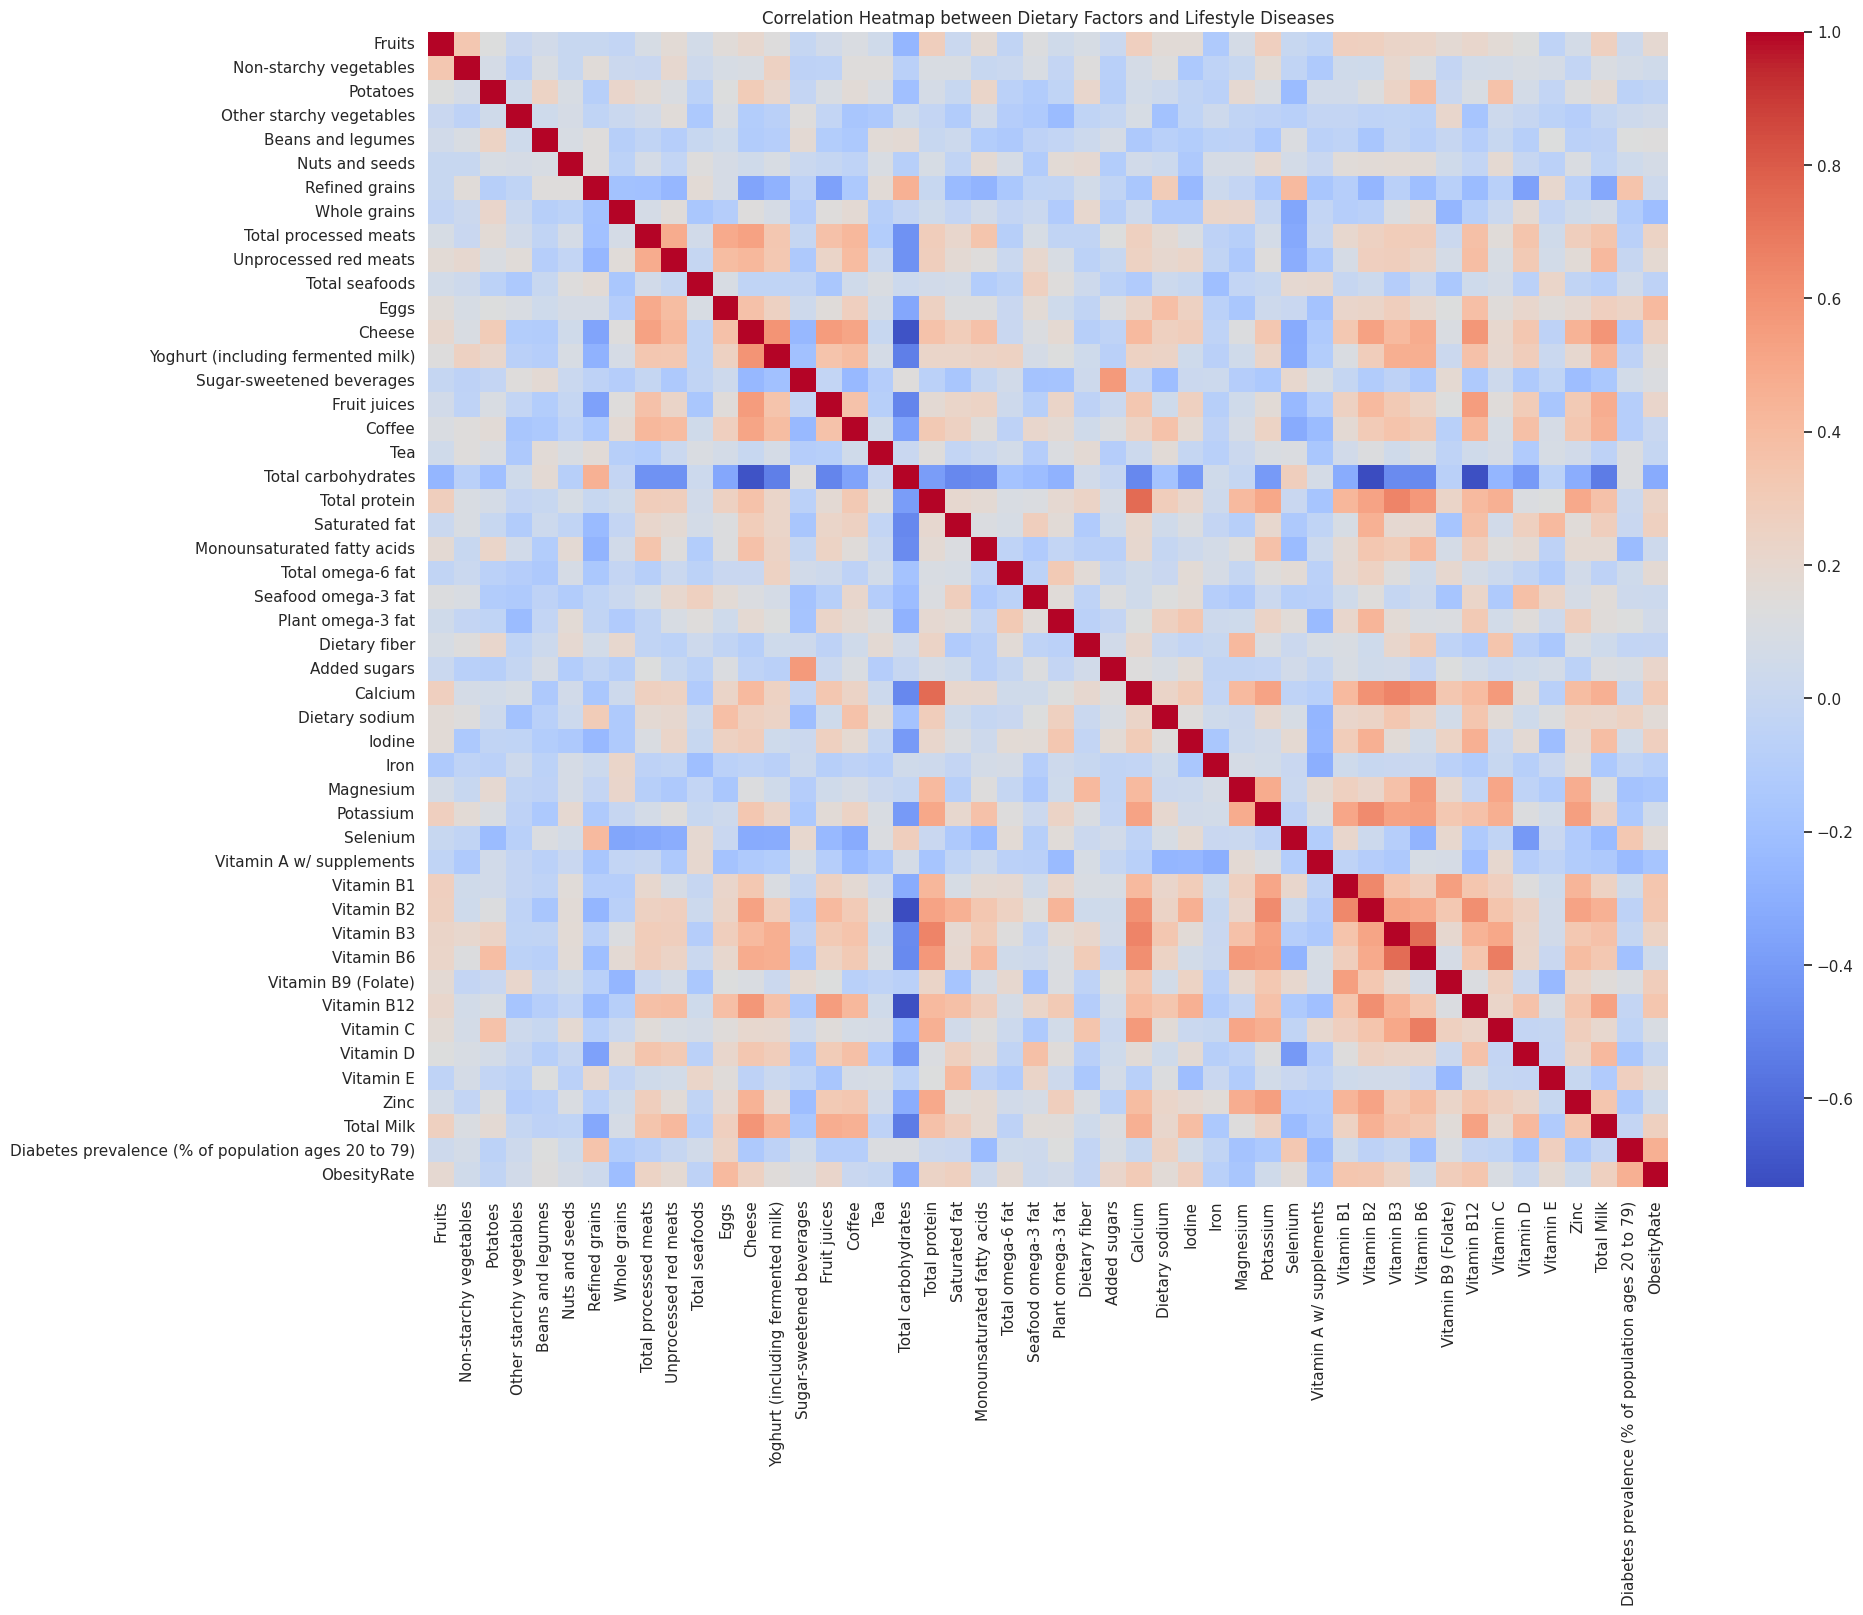

,Diabetes prevalence (% of population ages 20 to 79),ObesityRate
ObesityRate,0.458911,1.000000
Diabetes prevalence (% of population ages 20 to 79),1.000000,0.458911
Eggs,0.239157,0.409327
Vitamin B1,0.043930,0.338809
Vitamin B12,-0.021957,0.337575
Vitamin B2,-0.054173,0.336133
Calcium,0.000519,0.303470
Vitamin B9 (Folate),0.108050,0.287397
Iodine,0.063734,0.274043
Saturated fat,0.005966,0.264571


In [ ]:

relevant_columns = [
    'Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'
]

df_for_correlation = df_cleaned[relevant_columns]

# Calculating correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between Dietary Factors and Lifestyle Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


correlation_with_diseases = correlation_matrix[['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].sort_values(by='ObesityRate', ascending=False)
correlation_with_diseases


# 2. **Geographical variation in lifestyle diseases**


*   **Continents with the Highest Levels of Diabetes Prevalence and obesity**




<ipython-input-22-7f6c25d63d7e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
<ipython-input-22-7f6c25d63d7e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')


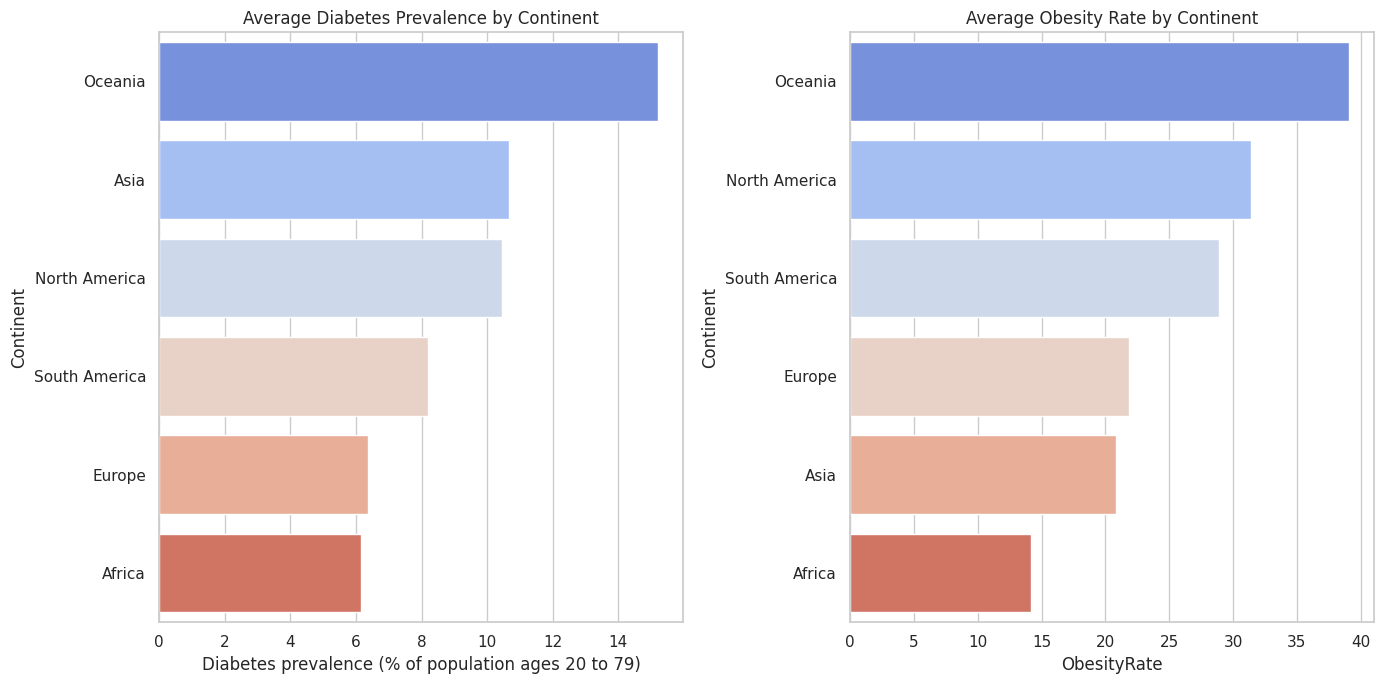

(       Continent  Diabetes prevalence (% of population ages 20 to 79)  \
 4        Oceania                                          15.209091     
 1           Asia                                          10.676087     
 3  North America                                          10.450000     
 5  South America                                           8.208333     
 2         Europe                                           6.360000     
 0         Africa                                           6.141509     
 
    ObesityRate  
 4    39.084545  
 1    20.790652  
 3    31.413182  
 5    28.871667  
 2    21.877000  
 0    14.170943  ,
        Continent  Diabetes prevalence (% of population ages 20 to 79)  \
 4        Oceania                                          15.209091     
 3  North America                                          10.450000     
 5  South America                                           8.208333     
 2         Europe                                        

In [ ]:
#Aggregating data by Continent to compare diabetes and obesity rates across continents
continent_aggregate = df_cleaned.groupby('Continent').agg({
    'Diabetes prevalence (% of population ages 20 to 79)': 'mean',
    'ObesityRate': 'mean'
}).reset_index()

#Sorting the data for better visualization
continent_aggregate_sorted_diabetes = continent_aggregate.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
continent_aggregate_sorted_obesity = continent_aggregate.sort_values(by='ObesityRate', ascending=False)

#Plotting
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='Diabetes prevalence (% of population ages 20 to 79)', y='Continent', data=continent_aggregate_sorted_diabetes, palette='coolwarm')
plt.title('Average Diabetes Prevalence by Continent')

plt.subplot(1, 2, 2)
sns.barplot(x='ObesityRate', y='Continent', data=continent_aggregate_sorted_obesity, palette='coolwarm')
plt.title('Average Obesity Rate by Continent')

plt.tight_layout()
plt.show()

# Displaying the sorted data frames for detailed examination
continent_aggregate_sorted_diabetes, continent_aggregate_sorted_obesity


Oceania has the highest average diabetes prevalence (approximately 15.2%) and the highest obesity rates (approximately 39.1%) among the continents analyzed. This indicates a significant health concern in terms of lifestyle diseases in this region.



*   **Countries with the Highest Levels of Diabetes**



In [ ]:
# Extracting countries with the highest diabetes and obesity rates for detailed analysis and Sorting the dataframe by diabetes prevalence and obesity rate
df_sorted_diabetes = df_cleaned.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)
df_sorted_obesity = df_cleaned.sort_values(by='ObesityRate', ascending=False)

#top10_diabetes_countries, top10_obesity_countries
#Identify countries with the highest levels of diabetes prevalence and obesity rates
top_diabetes_countries = data.sort_values(by='Diabetes prevalence (% of population ages 20 to 79)', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)
top_obesity_countries = data.sort_values(by='ObesityRate', ascending=False)[['Entity', 'Continent', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].head(10)

(top_diabetes_countries, top_obesity_countries)



(               Entity Continent  \
 129          Pakistan      Asia   
 92             Kuwait      Asia   
 108  Marshall Islands   Oceania   
 117         Mauritius    Africa   
 90           Kiribati   Oceania   
 50              Egypt    Africa   
 146   Solomon Islands   Oceania   
 138             Qatar      Asia   
 119          Malaysia      Asia   
 143             Sudan    Africa   
 
      Diabetes prevalence (% of population ages 20 to 79)  ObesityRate  
 129                                               30.8          21.85  
 92                                                24.9          41.30  
 108                                               23.0          45.48  
 117                                               22.6          18.87  
 90                                                22.1          45.98  
 50                                                20.9          43.64  
 146                                               19.8          22.20  
 138              

Tonga and Samoa lead with obesity rates of 70.8% and 61.77%, respectively, highlighting a major public health concern.
Micronesia, Kiribati, and the Marshall Islands also feature prominently, with obesity rates ranging from approximately 45% to 46%.
Outside of Oceania, Egypt, Qatar, and the United States show high obesity rates, with the US at 41.48%.


Focusing deeper into the relationship between dietary patterns, focusing on the consumption of refined grains and sugar-sweetened beverages, and their impact on obesity and diabetes rates.


**Step 1:Visualize the Relationship between Refined Grain Consumption and Diabetes Prevalence**

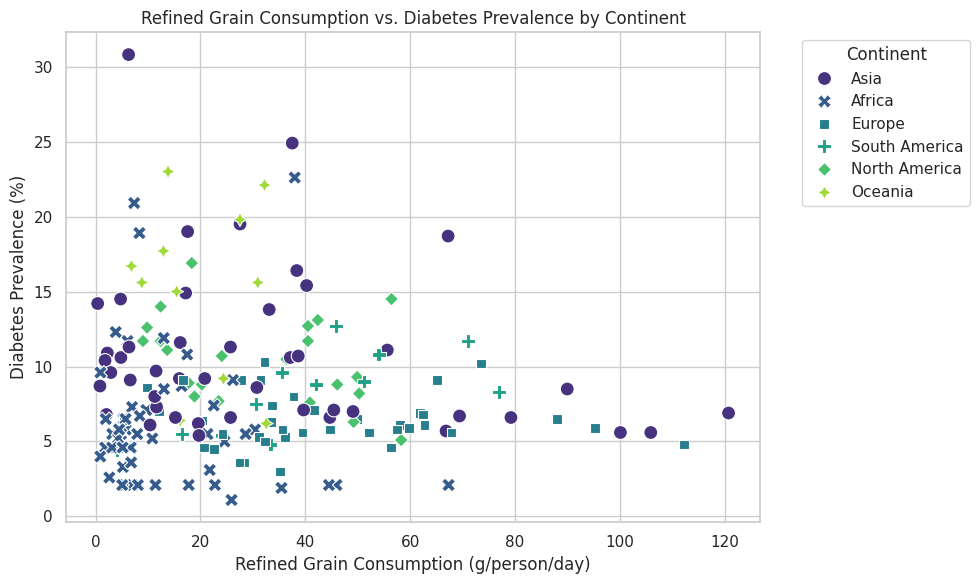

In [ ]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Scatter plot for Refined Grain Consumption vs. Diabetes Prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Total processed meats", y="Diabetes prevalence (% of population ages 20 to 79)", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Refined Grain Consumption vs. Diabetes Prevalence by Continent')
plt.xlabel('Refined Grain Consumption (g/person/day)')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 **Step 2: Visualize the Relationship between Sugar-Sweetened Beverage Consumption and Obesity Rates**

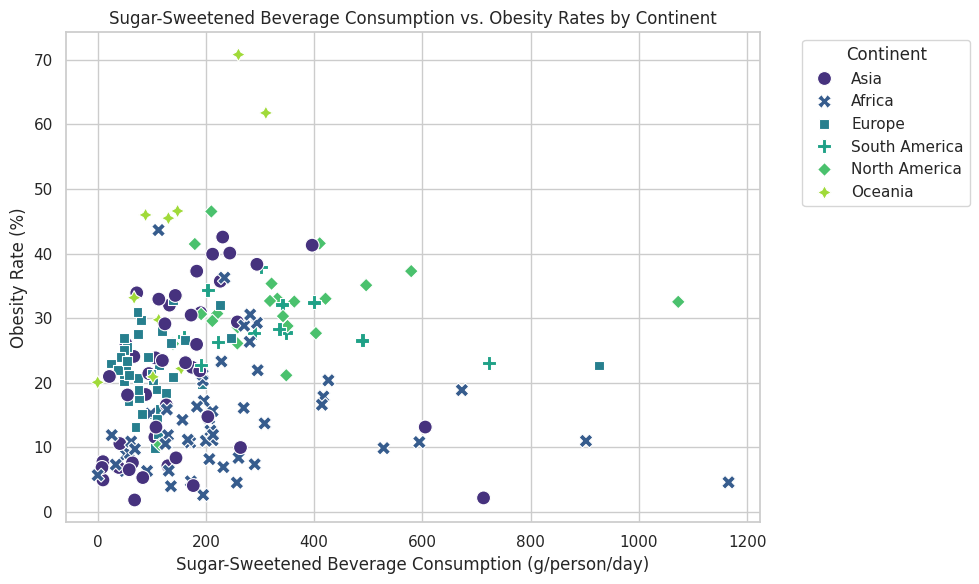

In [ ]:
# Scatter plot for Sugar-Sweetened Beverage Consumption vs. Obesity Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Sugar-sweetened beverages", y="ObesityRate", hue="Continent", style="Continent", palette="viridis", s=100)
plt.title('Sugar-Sweetened Beverage Consumption vs. Obesity Rates by Continent')
plt.xlabel('Sugar-Sweetened Beverage Consumption (g/person/day)')
plt.ylabel('Obesity Rate (%)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **3**.**National dishes and the prevalence of lifestyle diseases**


In [ ]:
# Previously identified countries with the highest levels of diabetes and obesity
top_diabetes_countries = ['Pakistan', 'Kuwait', 'Marshall Islands', 'Mauritius', 'Kiribati', 'Egypt', 'Solomon Islands', 'Qatar', 'Malaysia', 'Sudan']
top_obesity_countries = ['Tonga', 'Samoa', 'Micronesia (country)', 'Bahamas', 'Kiribati', 'Marshall Islands', 'Egypt', 'Qatar', 'Belize', 'United States']


national_dishes_high_diabetes_obesity = df_cleaned[df_cleaned['Entity'].isin(top_diabetes_countries) | df_cleaned['Entity'].isin(top_obesity_countries)][['Entity', 'National Dish', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']]

national_dishes_high_diabetes_obesity

KeyError: "['National Dish'] not in index"

# **Correlation Exploration**

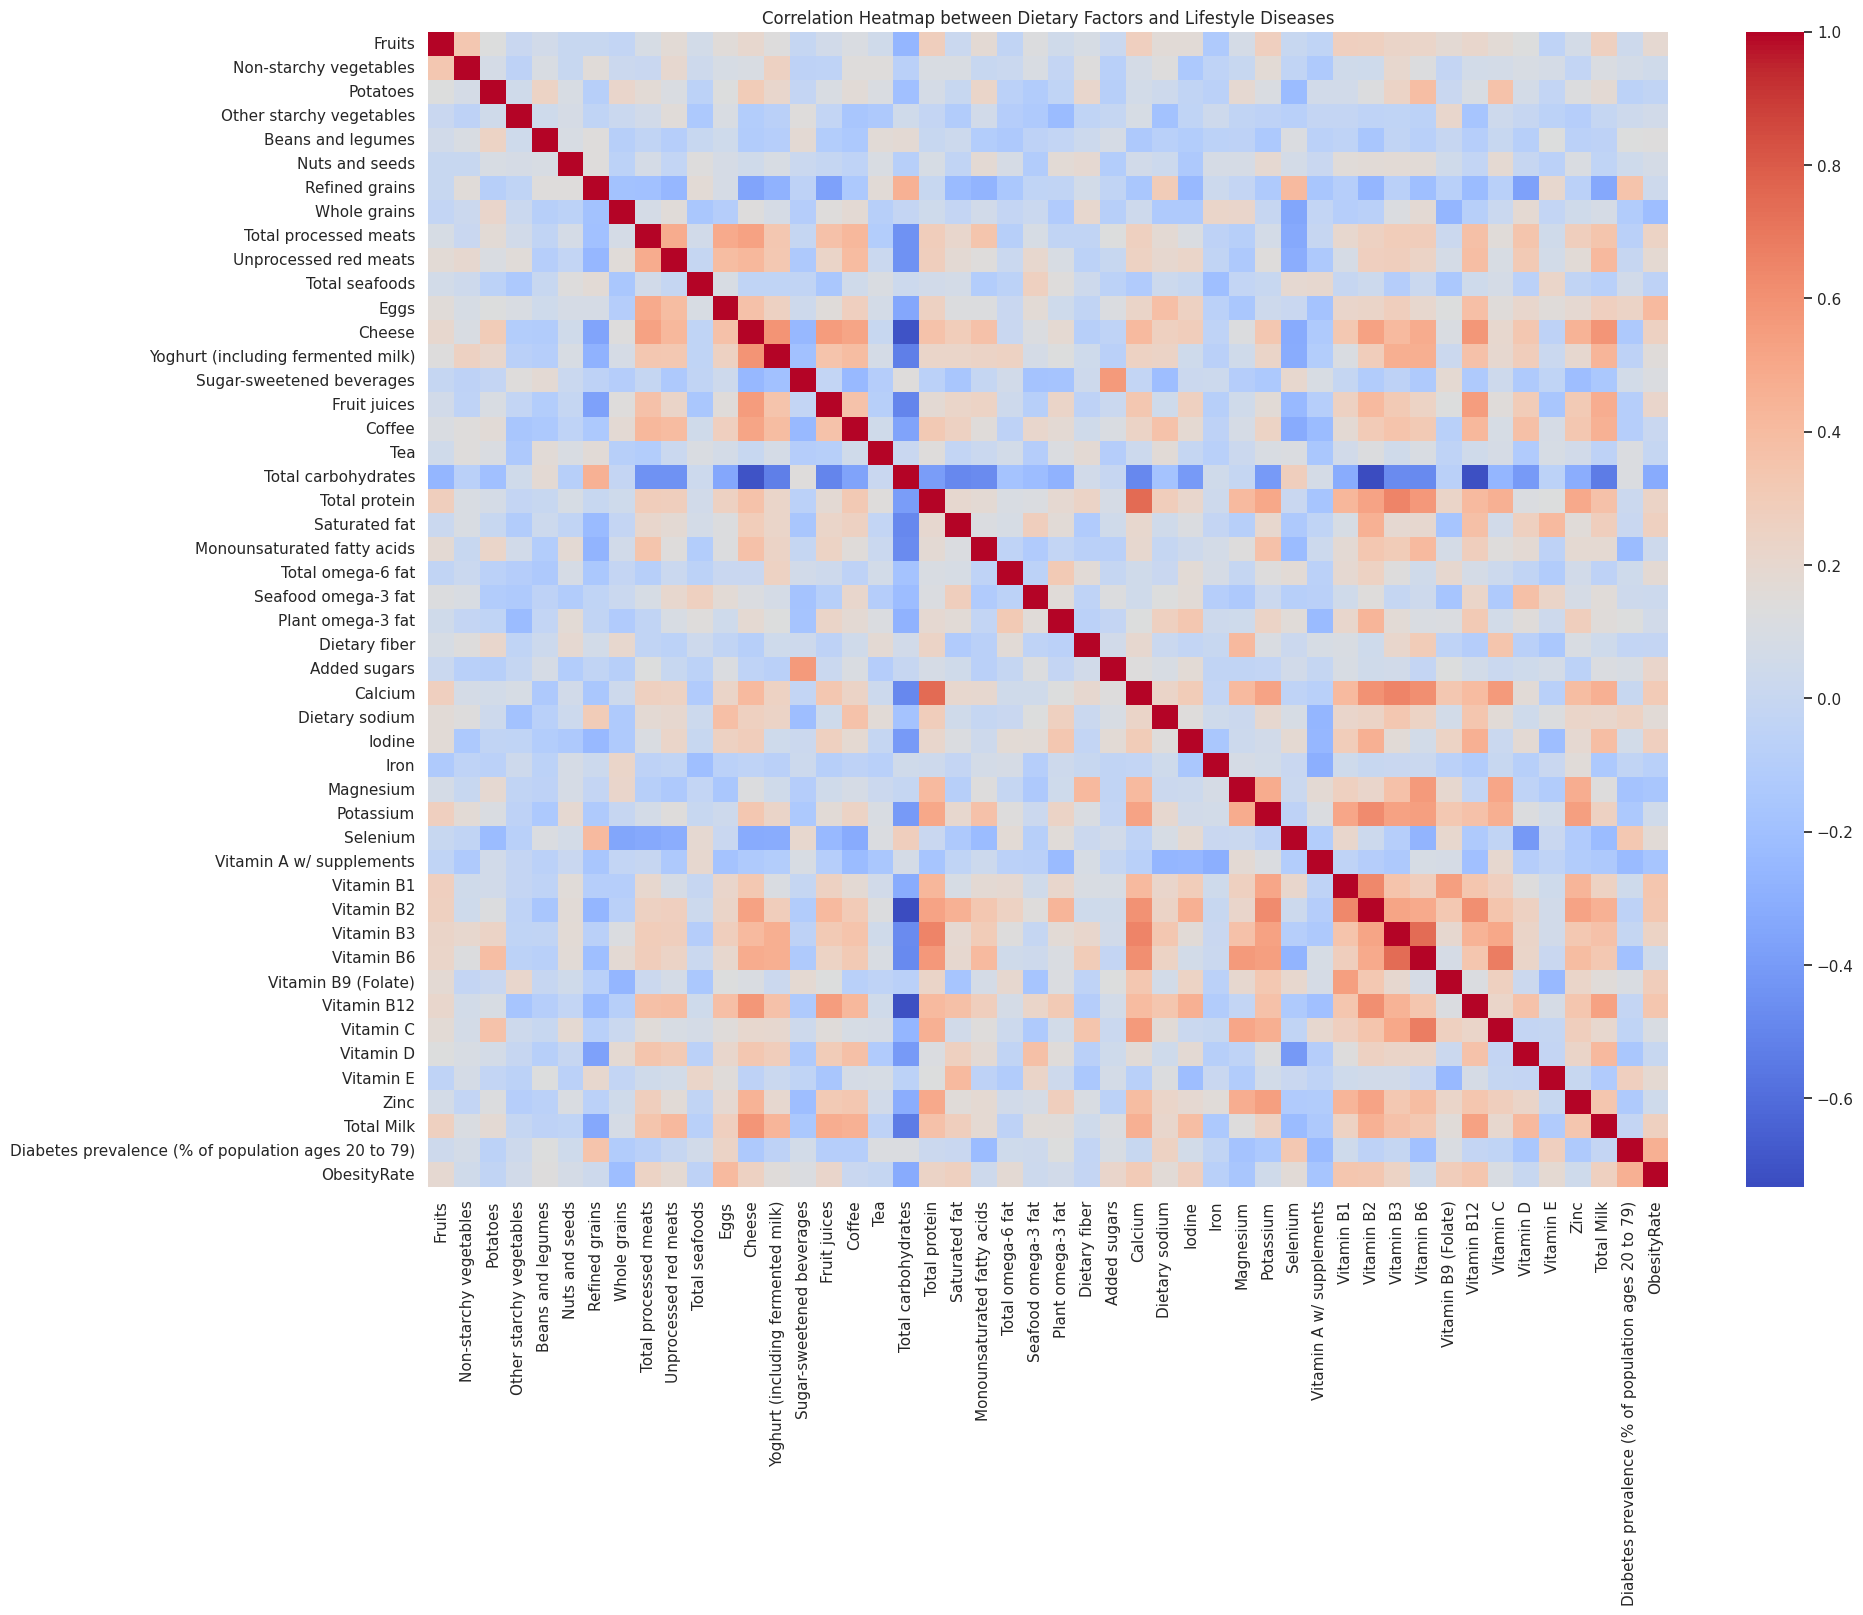

,Diabetes prevalence (% of population ages 20 to 79),ObesityRate
ObesityRate,0.458911,1.000000
Diabetes prevalence (% of population ages 20 to 79),1.000000,0.458911
Eggs,0.239157,0.409327
Vitamin B1,0.043930,0.338809
Vitamin B12,-0.021957,0.337575
Vitamin B2,-0.054173,0.336133
Calcium,0.000519,0.303470
Vitamin B9 (Folate),0.108050,0.287397
Iodine,0.063734,0.274043
Saturated fat,0.005966,0.264571


In [ ]:
# Selecting relevant columns for correlation analysis
relevant_columns = [
    'Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate'
]

# Focusing on relevant columns for correlation analysis
df_for_correlation = df_cleaned[relevant_columns]

# Calculating correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between Dietary Factors and Lifestyle Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# We'll specifically look at correlations with Diabetes and Obesity to answer question 1.
correlation_with_diseases = correlation_matrix[['Diabetes prevalence (% of population ages 20 to 79)', 'ObesityRate']].sort_values(by='ObesityRate', ascending=False)
correlation_with_diseases


Eggs, Vitamin B1, and Vitamin B12 show a positive correlation with both diabetes prevalence and obesity rate, suggesting a nuanced relationship between these nutrients and lifestyle diseases

Whole grains and Total carbohydrates show a negative correlation with obesity rates, indicating that higher consumption of these foods might be associated with lower obesity levels. This might reflect the benefits of complex carbohydrates and dietary fiber.

# **INCOME AND LIFESTYLE DISEASES**

In [ ]:
# Scatter plot for GNI vs. Obesity Rate
sns.scatterplot(x='Gross National Income Per Capita (2021)', y='ObesityRate', data=data_cleaned)
plt.title('GNI Per Capita vs. Obesity Rate')
plt.xlabel('Gross National Income Per Capita (2021)')
plt.ylabel('Obesity Rate (%)')
plt.show()

# Scatter plot for GNI vs. Diabetes Prevalence
sns.scatterplot(x='Gross National Income Per Capita (2021)', y='Diabetes prevalence (% of population ages 20 to 79)', data=data_cleaned)
plt.title('GNI Per Capita vs. Diabetes Prevalence')
plt.xlabel('Gross National Income Per Capita (2021)')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()


NameError: name 'data_cleaned' is not defined

Data Distribution: There is a wide distribution of GNI per capita, with most data points congregating toward the lower end of the income scale. This suggests that most countries in this dataset have a lower GNI per capita.

Diabetes Prevalence: Diabetes prevalence varies across countries, with several countries having rates above 20%, which is relatively high.

Correlation:There does not appear to be a clear linear relationship between GNI per capita and diabetes prevalence. While there are countries with low GNI per capita and various diabetes prevalence rates, there's no distinct upward or downward trend that would indicate a strong correlation.

High-Income Countries: A few high-income countries appear to have either a lower or moderate prevalence of diabetes, but there's not enough visible trend to draw a definitive conclusion about the impact of high income on diabetes prevalence.


Lower-Income Countries: Amongst lower-income countries, diabetes prevalence rates are spread out, suggesting that factors other than income may play a significant role in diabetes prevalence.

In [ ]:
# Calculate and print Pearson correlation coefficients
obesity_correlation = data_cleaned['Gross National Income Per Capita (2021)'].corr(data_cleaned['ObesityRate'])
diabetes_correlation = data_cleaned['Gross National Income Per Capita (2021)'].corr(data_cleaned['Diabetes prevalence (% of population ages 20 to 79)'])

print(f"Correlation between GNI Per Capita and Obesity Rate: {obesity_correlation}")
print(f"Correlation between GNI Per Capita and Diabetes Prevalence: {diabetes_correlation}")


NameError: name 'data_cleaned' is not defined

In [ ]:
# Selecting relevant columns for correlation analysis
relevant_columns1 = [
    'Diabetes prevalence (% of population ages 20 to 79)','Fruits', 'Non-starchy vegetables', 'Potatoes', 'Other starchy vegetables', 'Beans and legumes',
    'Nuts and seeds', 'Refined grains', 'Whole grains', 'Total processed meats', 'Unprocessed red meats',
    'Total seafoods', 'Eggs', 'Cheese', 'Yoghurt (including fermented milk)', 'Sugar-sweetened beverages',
    'Fruit juices', 'Coffee', 'Tea', 'Total carbohydrates', 'Total protein', 'Saturated fat',
    'Monounsaturated fatty acids', 'Total omega-6 fat', 'Seafood omega-3 fat', 'Plant omega-3 fat',
    'Dietary fiber', 'Added sugars', 'Calcium', 'Dietary sodium', 'Iodine', 'Iron', 'Magnesium',
    'Potassium', 'Selenium', 'Vitamin A w/ supplements', 'Vitamin B1', 'Vitamin B2', 'Vitamin B3',
    'Vitamin B6', 'Vitamin B9 (Folate)', 'Vitamin B12', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Zinc',
    'Total Milk', 'ObesityRate'
]

# Focusing on relevant columns for correlation analysis
df_for_model = df_cleaned[relevant_columns1]

In [ ]:
df_for_model

,Diabetes prevalence (% of population ages 20 to 79),Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,Refined grains,Whole grains,Total processed meats,...,Vitamin B3,Vitamin B6,Vitamin B9 (Folate),Vitamin B12,Vitamin C,Vitamin D,Vitamin E,Zinc,Total Milk,ObesityRate
0,10.9,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,223.168905,41.528924,2.238317,...,13.506114,1.104237,190.395113,1.799365,42.126845,1.594519,6.426413,7.644691,69.785193,18.19
1,4.6,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,223.838504,57.592403,1.834424,...,13.458252,1.674145,266.296534,2.385507,179.500622,1.717556,7.970200,7.274286,32.784132,11.11
2,10.2,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,252.814018,31.213772,73.437068,...,29.577227,2.299154,269.593547,3.877962,128.673375,5.063677,15.171798,7.995075,113.739785,22.69
3,16.4,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,337.642299,37.176284,38.369565,...,23.532757,1.363786,419.596541,3.072174,84.865840,2.197133,7.379018,8.514326,129.185734,32.02
4,5.4,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,174.327695,10.813137,24.181776,...,18.262302,1.225320,440.697491,4.255942,53.516605,2.608307,8.424583,9.163603,136.438275,34.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,9.2,140.298982,336.380953,13.158776,20.610665,231.055331,26.075091,167.685331,10.625210,24.382973,...,14.991218,1.211559,224.222861,3.525843,69.688241,4.504330,20.973773,8.271951,135.140556,61.77
181,5.4,39.336626,58.530138,80.552301,37.109278,28.888928,3.392899,241.914573,20.346556,19.715584,...,21.005360,1.756198,171.501287,3.005812,82.130158,1.221586,11.922963,7.296379,101.881131,13.15
182,10.8,32.667852,131.801080,54.860450,39.778680,32.258336,0.226813,226.777072,68.557609,17.472404,...,17.290615,1.246154,194.294094,3.046717,37.887315,2.943259,8.515702,9.207601,94.349931,30.56
183,11.9,51.185607,195.758520,23.045660,20.531105,20.586087,19.666407,238.456700,55.699525,13.002829,...,13.387016,1.419700,233.872893,2.242698,88.267127,1.805338,11.208324,8.040751,31.137655,10.54


In [ ]:
l_column = list(df_for_model.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['Diabetes prevalence (% of population ages 20 to 79)',
 'Fruits',
 'Non-starchy vegetables',
 'Potatoes',
 'Other starchy vegetables',
 'Beans and legumes',
 'Nuts and seeds',
 'Refined grains',
 'Whole grains',
 'Total processed meats',
 'Unprocessed red meats',
 'Total seafoods',
 'Eggs',
 'Cheese',
 'Yoghurt (including fermented milk)',
 'Sugar-sweetened beverages',
 'Fruit juices',
 'Coffee',
 'Tea',
 'Total carbohydrates',
 'Total protein',
 'Saturated fat',
 'Monounsaturated fatty acids',
 'Total omega-6 fat',
 'Seafood omega-3 fat',
 'Plant omega-3 fat',
 'Dietary fiber',
 'Added sugars',
 'Calcium',
 'Dietary sodium',
 'Iodine',
 'Iron',
 'Magnesium',
 'Potassium',
 'Selenium',
 'Vitamin A w/ supplements',
 'Vitamin B1',
 'Vitamin B2',
 'Vitamin B3',
 'Vitamin B6',
 'Vitamin B9 (Folate)',
 'Vitamin B12',
 'Vitamin C',
 'Vitamin D',
 'Vitamin E',
 'Zinc',
 'Total Milk',
 'ObesityRate']

In [ ]:
X = df_for_model[l_column[1:len_feature]]
y = df_for_model[l_column[0]]

In [ ]:
X

,Fruits,Non-starchy vegetables,Potatoes,Other starchy vegetables,Beans and legumes,Nuts and seeds,Refined grains,Whole grains,Total processed meats,Unprocessed red meats,...,Vitamin B3,Vitamin B6,Vitamin B9 (Folate),Vitamin B12,Vitamin C,Vitamin D,Vitamin E,Zinc,Total Milk,ObesityRate
0,65.697036,98.080124,21.195808,44.892140,103.830266,31.205695,223.168905,41.528924,2.238317,8.686127,...,13.506114,1.104237,190.395113,1.799365,42.126845,1.594519,6.426413,7.644691,69.785193,18.19
1,119.746980,308.837004,346.377109,52.662482,37.799557,11.612246,223.838504,57.592403,1.834424,17.956861,...,13.458252,1.674145,266.296534,2.385507,179.500622,1.717556,7.970200,7.274286,32.784132,11.11
2,138.874360,129.083757,185.783632,73.031694,40.181361,12.272771,252.814018,31.213772,73.437068,67.946539,...,29.577227,2.299154,269.593547,3.877962,128.673375,5.063677,15.171798,7.995075,113.739785,22.69
3,107.577820,123.284747,182.972287,57.068126,40.563807,31.729379,337.642299,37.176284,38.369565,29.418572,...,23.532757,1.363786,419.596541,3.072174,84.865840,2.197133,7.379018,8.514326,129.185734,32.02
4,93.995787,123.803276,51.336122,7.010755,3.575009,1.564769,174.327695,10.813137,24.181776,87.927046,...,18.262302,1.225320,440.697491,4.255942,53.516605,2.608307,8.424583,9.163603,136.438275,34.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,140.298982,336.380953,13.158776,20.610665,231.055331,26.075091,167.685331,10.625210,24.382973,29.830906,...,14.991218,1.211559,224.222861,3.525843,69.688241,4.504330,20.973773,8.271951,135.140556,61.77
181,39.336626,58.530138,80.552301,37.109278,28.888928,3.392899,241.914573,20.346556,19.715584,21.683061,...,21.005360,1.756198,171.501287,3.005812,82.130158,1.221586,11.922963,7.296379,101.881131,13.15
182,32.667852,131.801080,54.860450,39.778680,32.258336,0.226813,226.777072,68.557609,17.472404,147.151504,...,17.290615,1.246154,194.294094,3.046717,37.887315,2.943259,8.515702,9.207601,94.349931,30.56
183,51.185607,195.758520,23.045660,20.531105,20.586087,19.666407,238.456700,55.699525,13.002829,43.620321,...,13.387016,1.419700,233.872893,2.242698,88.267127,1.805338,11.208324,8.040751,31.137655,10.54


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (129, 47)
Test feature set size: (56, 47)
Training variable set size: (129,)
Test variable set size: (56,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [ ]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression()

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: 27.643547573122106


In [ ]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [-6.91988811e-03 -6.17299239e-04  7.96796766e-03 -9.25467640e-04
 -2.30483087e-02 -2.13747174e-02  1.11398270e-03  1.35469991e-02
 -1.02962286e-02  2.37312589e-04  1.43109192e-03  3.32522614e-02
 -5.15797892e-02 -4.40034522e-04  4.29601616e-03 -2.69228947e-02
  6.86541591e-02  2.11248592e+00 -1.36234224e-01  1.44113993e-03
  2.62849519e-02 -4.32887285e-03 -3.88013194e+00  1.29615576e-03
  1.99310802e-03 -2.71552597e-03 -5.23572376e-02  3.84226211e-03
  1.38905701e-03  4.87844141e-03 -7.46161508e-02 -1.04007680e-03
  1.01603940e-04  2.48280018e-03 -8.85158143e-04 -4.41888394e+00
 -4.48943497e+00  1.03341470e-01 -4.03556180e+00  7.77661301e-03
 -1.71442196e+00  1.07780126e-02 -9.76348623e-02  2.08914247e-01
  1.35027307e-01  7.27989740e-03  2.12726586e-01]


In [ ]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
Fruits,-0.006920
Non-starchy vegetables,-0.000617
Potatoes,0.007968
Other starchy vegetables,-0.000925
Beans and legumes,-0.023048
Nuts and seeds,-0.021375
Refined grains,0.001114
Whole grains,0.013547
Total processed meats,-0.010296
Unprocessed red meats,0.000237


In [ ]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Fruits,-0.006920,0.005858,-1.181193
Non-starchy vegetables,-0.000617,0.005087,-0.121344
Potatoes,0.007968,0.004419,1.803049
Other starchy vegetables,-0.000925,0.012441,-0.074391
Beans and legumes,-0.023048,0.012118,-1.902013
Nuts and seeds,-0.021375,0.037910,-0.563830
Refined grains,0.001114,0.002766,0.402774
Whole grains,0.013547,0.010916,1.240967
Total processed meats,-0.010296,0.016008,-0.643208
Unprocessed red meats,0.000237,0.009673,0.024534


In [ ]:
print("Therefore, features arranged in the order of importance for predicting the Diabetes Rate\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the Diabetes Rate
------------------------------------------------------------------------------------------
ObesityRate > 
Dietary sodium > 
Vitamin E > 
Calcium > 
Vitamin B3 > 
Tea > 
Plant omega-3 fat > 
Potatoes > 
Vitamin B9 (Folate) > 
Sugar-sweetened beverages > 
Total Milk > 
Whole grains > 
Eggs > 
Seafood omega-3 fat > 
Vitamin C > 
Zinc > 
Iodine > 
Refined grains > 
Selenium > 
Potassium > 
Saturated fat > 
Coffee > 
Total seafoods > 
Total protein > 
Unprocessed red meats > 
Monounsaturated fatty acids > 
Yoghurt (including fermented milk) > 
Other starchy vegetables > 
Dietary fiber > 
Non-starchy vegetables > 
Magnesium > 
Vitamin D > 
Nuts and seeds > 
Total processed meats > 
Added sugars > 
Iron > 
Fruit juices > 
Fruits > 
Total omega-6 fat > 
Vitamin A w/ supplements > 
Beans and legumes > 
Cheese > 
Vitamin B1 > 
Total carbohydrates > 
Vitamin B6 > 
Vitamin B2 > 
Vitamin B12


Text(0.5, 1.0, 'Vitamin B12 vs. Diabetes prevalence ')

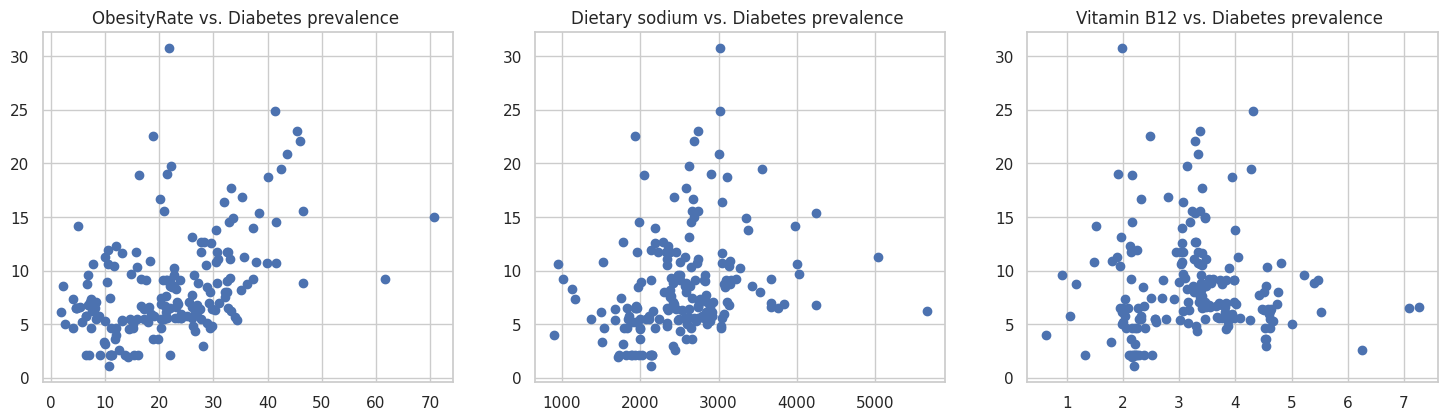

In [ ]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(df_for_model[l[46]],df_for_model['Diabetes prevalence (% of population ages 20 to 79)'])
ax0.set_title(l[46]+" vs. Diabetes prevalence ", fontdict={'fontsize':12})


ax0 = plt.subplot(gs[1])
ax0.scatter(df_for_model[l[28]],df_for_model['Diabetes prevalence (% of population ages 20 to 79)'])
ax0.set_title(l[28]+" vs. Diabetes prevalence ", fontdict={'fontsize':12})

ax0 = plt.subplot(gs[2])
ax0.scatter(df_for_model[l[40]],df_for_model['Diabetes prevalence (% of population ages 20 to 79)'])
ax0.set_title(l[40]+" vs. Diabetes prevalence ", fontdict={'fontsize':12})


In [ ]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.484


In [ ]:
print(df_for_model.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Diabetes prevalence (% of population ages 20 to 79)  185 non-null    float64
 1   Fruits                                               185 non-null    float64
 2   Non-starchy vegetables                               185 non-null    float64
 3   Potatoes                                             185 non-null    float64
 4   Other starchy vegetables                             185 non-null    float64
 5   Beans and legumes                                    185 non-null    float64
 6   Nuts and seeds                                       185 non-null    float64
 7   Refined grains                                       185 non-null    float64
 8   Whole grains                                         185 non-null    f